# **Dimensionality reduction**

**Dimensionality reduction** is a set of techniques in machine learning and statistics that reduce the number of random variables under consideration by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.


**Importance of Dimensionality Reduction:**

**Reduces Overfitting:** Lower-dimensional data is less likely to fit noise in the data, reducing the chance of overfitting.

**Improves Efficiency:** By reducing the computational burden, algorithms run faster and require less storage.

**Eliminates Redundancy:** It removes multicollinearity by discarding redundant features which can improve model performance.

**Enhances Visualization:** It allows visualizing high-dimensional data in 2D or 3D.

**Improves Model Performance:** In some cases, it can improve the performance of the models by removing noise and irrelevant features.

# **Techniques Explored:**

**PCA (Principal Component Analysis):** A statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

**SVD (Singular Value Decomposition):** A factorization of a real or complex matrix that generalizes the eigendecomposition of a square normal matrix to any
m x n matrix via an extension of the polar decomposition.

**MDS (Multidimensional Scaling):** A means of visualizing the level of similarity of individual cases of a dataset by plotting them in a low-dimensional space.

**ISOMap (Isometric Mapping):** A nonlinear dimensionality reduction method that is well-suited for embedding high-dimensional data into a lower-dimensional space by preserving the geodesic distances between points.

**LLE (Locally Linear Embedding):** A manifold learning technique that computes low-dimensional, neighborhood-preserving embeddings of high-dimensional data by reconstructing each data point as a linear combination of its neighbors.

**UMAP (Uniform Manifold Approximation and Projection):** A dimensionality reduction technique that is particularly effective at preserving both local and more global structure of the data in a low-dimensional representation.

**t-SNE (t-Distributed Stochastic Neighbor Embedding):** A tool to visualize high-dimensional data by reducing it to two or three dimensions while maintaining the similarity between data points as much as possible.

# **PCA on iris-dataset**

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joashmuganda","key":"fe44241e666f2c0f483b9b4ba3bd7eb7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d himanshunakrani/iris-dataset


  0% 0.00/0.98k [00:00<?, ?B/s]
100% 0.98k/0.98k [00:00<00:00, 2.97MB/s]


In [ ]:
!unzip iris-dataset.zip


Archive:  iris-dataset.zip
  inflating: iris.csv                


In [ ]:
!ls

Corona_NLP_test.csv		      iris.csv		links.csv	   ratings.csv	u.data
Corona_NLP_train.csv		      iris-dataset.zip	movielens100k.zip  sample_data
covid-19-nlp-text-classification.zip  kaggle.json	movies.csv	   tags.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset
iris_df = pd.read_csv('iris.csv')

# Display the first few rows of the DataFrame
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# **Data Preprocessing**

Separate the features and the target variable.
Standardize the feature variables.

In [ ]:
# Separating out the features and the target variable
X = iris_df.drop('species', axis=1)  # Features
y = iris_df['species']  # Target

# Standardizing the features (important for PCA)
X_standardized = StandardScaler().fit_transform(X)

# Checking the standardized features
print(X_standardized[:5])  # Displaying first 5 rows


[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


# **Apply PCA**

In [ ]:
# Creating a PCA instance: PCA for 2 components
pca = PCA(n_components=2)

# Fitting and transforming the data
principal_components = pca.fit_transform(X_standardized)

# Creating a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenating the target variable with principal components
final_df = pd.concat([pca_df, y], axis=1)

# Displaying the first few rows of final DataFrame
print(final_df.head())


   Principal Component 1  Principal Component 2 species
0              -2.264542               0.505704  setosa
1              -2.086426              -0.655405  setosa
2              -2.367950              -0.318477  setosa
3              -2.304197              -0.575368  setosa
4              -2.388777               0.674767  setosa


# **Visualization**

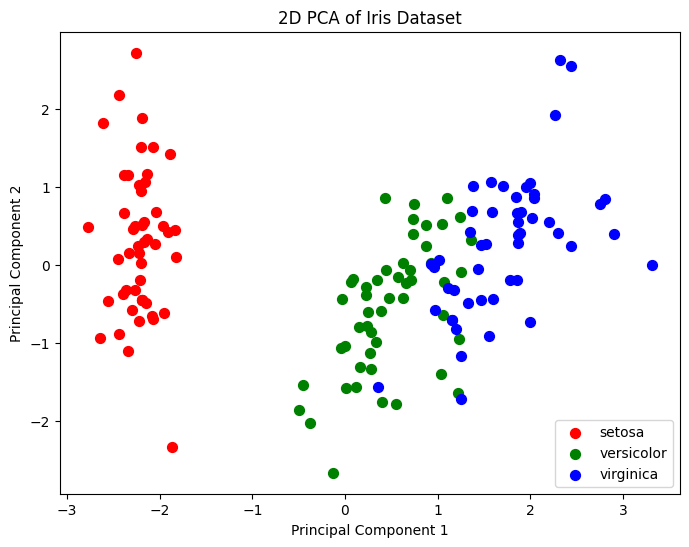

In [ ]:
# Plotting the principal components
plt.figure(figsize=(8, 6))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Iris Dataset')

targets = iris_df['species'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = final_df['species'] == target
    plt.scatter(final_df.loc[indicesToKeep, 'Principal Component 1']
               , final_df.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)

plt.legend(targets)
plt.show()


# **Insights**

The setosa species (red points) is well separated from the other two species, indicating that it's quite distinct in its features compared to versicolor and virginica.
Versicolor (green points) and virginica (blue points) species are more mixed but still form relatively distinct clusters.
This separation suggests that even after reducing the dimensionality of the dataset from four dimensions to two, the principal components retain enough information to distinguish between the species, especially for setosa.

## **Why Iris greate for CPA**


**Feature Correlation:** PCA is effective when features are correlated, as seen with petal length and width in the Iris dataset, capturing variance efficiently in fewer dimensions.

**Data Visualization:** With four features, the Iris dataset cannot be visualized in 2D or 3D; PCA enables this, revealing patterns like species clustering.

**Inherent Structure:** PCA brings out the Iris dataset's structure, highlighting measurement differences between species through principal components.

**Redundancy Reduction:** It combines correlated features into single components, reducing data redundancy without significant information loss.

**Simplicity and Interpretability: **As a straightforward linear transformation, PCA is easy to understand, making it an excellent introductory tool for dimensionality reduction.

## **Hyperparameters changing**

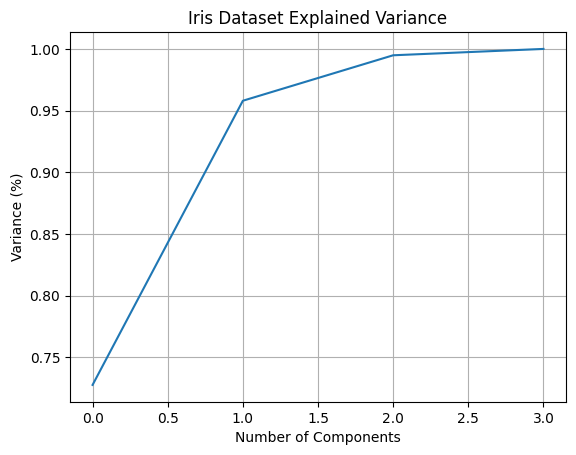

In [ ]:
# Given the above code snippet, we have X_standardized which we can use to fit PCA
# and determine the optimal number of components based on explained variance.

# We will now fit PCA without specifying the number of components to find the optimal number
pca = PCA().fit(X_standardized)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Iris Dataset Explained Variance')
plt.grid(True)
plt.show()


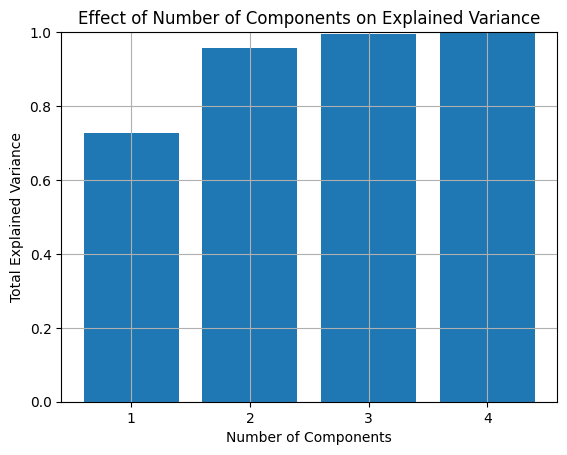

In [ ]:
# Demonstrate how changing the number of components in PCA affects the results on the Iris dataset

# Trying different numbers of components
n_components_list = [1, 2, 3, 4]
explained_variances = []

# Loop over different numbers of components to see the variance it captures
for n in n_components_list:
    pca = PCA(n_components=n)
    pca.fit(X_standardized)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

# Plotting
plt.figure()
plt.bar(n_components_list, explained_variances)
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance')
plt.title('Effect of Number of Components on Explained Variance')
plt.xticks(n_components_list)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Two Components: The explained variance increases notably with two components. This suggests that two components together capture most of the variance, providing a more comprehensive representation of the dataset.

Three Components: Adding a third component increases the explained variance further, though the incremental increase is less than what was observed when going from one to two components.

Four Components: With four components, the explained variance reaches 100%. This is expected as the original Iris dataset has four features. Using all four components essentially means no dimensionality reduction is happening; the PCA is capturing the full variance present in the original dataset.

## **Microsoft Malware - AvSigVersion Threat Details**

In [ ]:
# Upload the kaggle.json file
from google.colab import files
files.upload()

# Make sure to install the kaggle packages
!pip install -q kaggle

# Create the kaggle directory, move the json file there, and change the permissions of the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d rquintino/malware-avsigversion-threats

# Unzip the dataset
!unzip malware-avsigversion-threats.zip


Saving kaggle.json to kaggle (3).json
malware-avsigversion-threats.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  malware-avsigversion-threats.zip
replace AvSigversion_Threats.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: AvSigversion_Threats.csv  


In [ ]:
import pandas as pd

# Load the dataset
malware_data = pd.read_csv('/content/AvSigversion_Threats.csv')

# Display the first few rows of the DataFrame
print(malware_data.head())


   index                         Name AlertLevel AvSigVersion          Type
0      0  Backdoor:MSIL/Bladabindi.AA     severe  1.155.266.0  AddedThreats
1      1     Backdoor:Win32/Farfli.AJ     severe  1.155.266.0  AddedThreats
2      2  Backdoor:Win32/NetWiredRC.B     severe  1.155.266.0  AddedThreats
3      3             PWS:Win32/Fareit     severe  1.155.266.0  AddedThreats
4      4        Trojan:Win32/Ceatrg.A     severe  1.155.266.0  AddedThreats


## ** Preprocess the Data**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Initialize the encoders
onehot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()

# One-hot encode the 'AlertLevel' and 'Type' columns
alertlevel_encoded = onehot_encoder.fit_transform(malware_data[['AlertLevel']]).toarray()
type_encoded = onehot_encoder.fit_transform(malware_data[['Type']]).toarray()

# Label encode the 'AvSigVersion' column
avsigversion_encoded = label_encoder.fit_transform(malware_data['AvSigVersion'])

# Combine the encoded features into a single DataFrame
encoded_features = np.hstack((alertlevel_encoded, type_encoded))
encoded_features = np.column_stack((encoded_features, avsigversion_encoded))

# Display the shape of the encoded features to verify
print(encoded_features.shape)


(1010337, 7)


## **Apply PCA**

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Reducing to two dimensions
principal_components = pca.fit_transform(encoded_features)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the first few rows of the PCA DataFrame
print(pca_df.head())


   Principal Component 1  Principal Component 2
0            4314.683322               0.961905
1            4314.683322               0.961905
2            4314.683322               0.961905
3            4314.683322               0.961905
4            4314.683322               0.961905


## **Visualization**

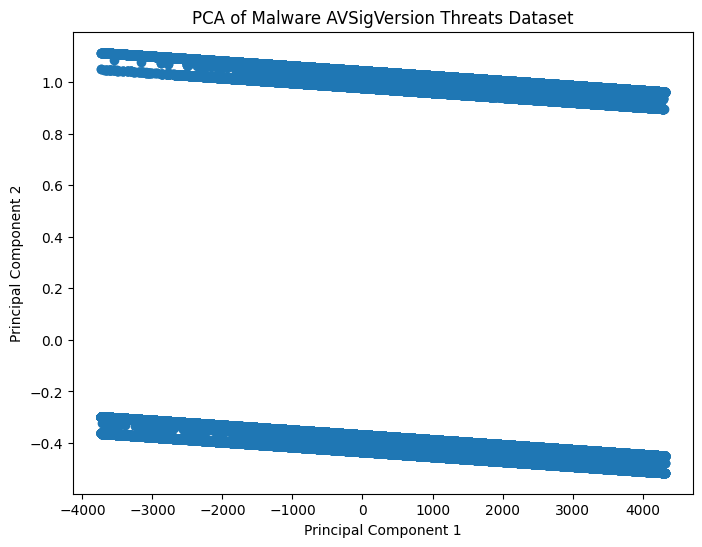

In [ ]:
import matplotlib.pyplot as plt

# Plotting the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Malware AVSigVersion Threats Dataset')
plt.show()


## **Why PCA did not work on this dataset:**


**Feature Dominance:** The wide range of values for 'AvSigVersion' after label encoding can dominate the principal components, skewing the PCA results.

**Sparse Data from Encoding:** One-hot encoding results in sparse matrices, which PCA does not handle well, as it's designed for dense datasets with linear relationships.

**Categorical Information Loss**: One-hot encoding loses the ordinal information of categorical variables, which PCA cannot recover, leading to a potential loss of data structure.

**Non-Linear Data**: PCA assumes linearity in data; however, the relationships in categorical data are often non-linear, which PCA cannot capture.

**Scale Sensitivity:** PCA's sensitivity to feature scaling can lead to misleading results when arbitrary numerical values are assigned through label encoding.

# **Changing hyperparameters:**

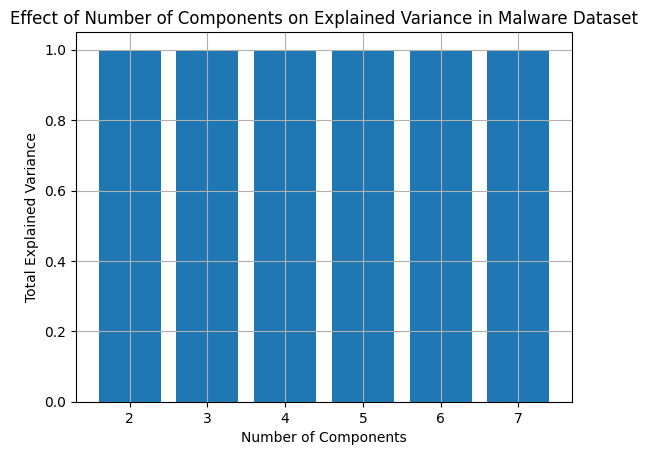

In [ ]:
# Adjusting the list of components to try, ensuring it does not exceed the minimum of (n_samples, n_features)
n_components_list = [2, 3, 4, 5, 6, 7]
explained_variances_malware = []

# Loop over the adjusted list of components
for n in n_components_list:
    pca_malware = PCA(n_components=n)
    pca_malware.fit(encoded_features)
    explained_variance_malware = np.sum(pca_malware.explained_variance_ratio_)
    explained_variances_malware.append(explained_variance_malware)

# Plotting the revised results
plt.figure()
plt.bar([str(n) for n in n_components_list], explained_variances_malware)
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance')
plt.title('Effect of Number of Components on Explained Variance in Malware Dataset')
plt.grid(True)
plt.show()


The findings indicate that increasing the number of principal components leads to a higher total explained variance for the malware dataset. However, the gain in variance is uniform across components, which is atypical for PCA and suggests that PCA may not be the most suitable method for dimensionality reduction in this context due to the categorical nature of the data.

# **SVD on movie-lens-small-latest-datase**

In [ ]:
from google.colab import files

# Upload the kaggle.json file
uploaded = files.upload()

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Movie Lens Small Latest Dataset
!kaggle datasets download -d shubhammehta21/movie-lens-small-latest-dataset
!unzip movie-lens-small-latest-dataset.zip

!kaggle datasets download -d datatattle/covid-19-nlp-text-classification
!unzip covid-19-nlp-text-classification.zip




Saving kaggle.json to kaggle (7).json
100% 971k/971k [00:00<00:00, 1.02MB/s]
100% 971k/971k [00:00<00:00, 1.02MB/s]
Archive:  movie-lens-small-latest-dataset.zip
  inflating: README.txt              
replace links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: links.csv               
replace movies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: movies.csv              
replace ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ratings.csv             
replace tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tags.csv                
covid-19-nlp-text-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid-19-nlp-text-classification.zip
replace Corona_NLP_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Corona_NLP_test.csv     
replace Corona_NLP_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Corona_NLP_train.csv    


In [ ]:
import pandas as pd

In [ ]:

# Load the smaller MovieLens dataset
movie_lens_ratings_df = pd.read_csv('/content/ratings.csv')
movie_lens_movies_df = pd.read_csv('/content/movies.csv')
movie_lens_links_df = pd.read_csv('/content/links.csv')
movie_lens_tags_df = pd.read_csv('/content/tags.csv')

# Similarly, for the COVID-19 NLP Text Classification dataset
covid_nlp_train_df = pd.read_csv('/content/Corona_NLP_train.csv', encoding='ISO-8859-1')
covid_nlp_test_df = pd.read_csv('/content/Corona_NLP_test.csv', encoding='ISO-8859-1')


In [ ]:
from scipy.sparse import csr_matrix

# Pivot the ratings data to create a user-item matrix
user_item_matrix = movie_lens_ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Convert to a sparse matrix
user_item_sparse_matrix = csr_matrix(user_item_matrix)


In [ ]:
import numpy as np

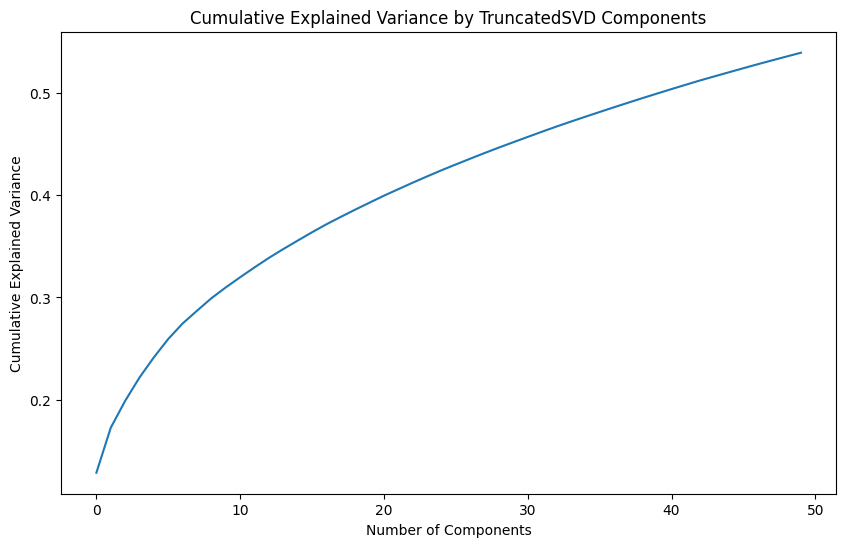

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Applying Truncated SVD
svd = TruncatedSVD(n_components=50, random_state=42)
user_item_svd = svd.fit_transform(user_item_sparse_matrix)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.title('Cumulative Explained Variance by TruncatedSVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


steady increase in explained variance as the number of components increases, indicating that each additional component contributes to capturing more of the data's variance.

In [ ]:
# Based on the plot, let's assume we choose 20 components as the optimal number
optimal_n_components = 20


In [ ]:
# Re-run TruncatedSVD with the optimal number of components
optimal_svd = TruncatedSVD(n_components=optimal_n_components, random_state=42)
user_item_svd_optimal = optimal_svd.fit_transform(user_item_sparse_matrix)

# Now you can use user_item_svd_optimal for making recommendations or further analysis.


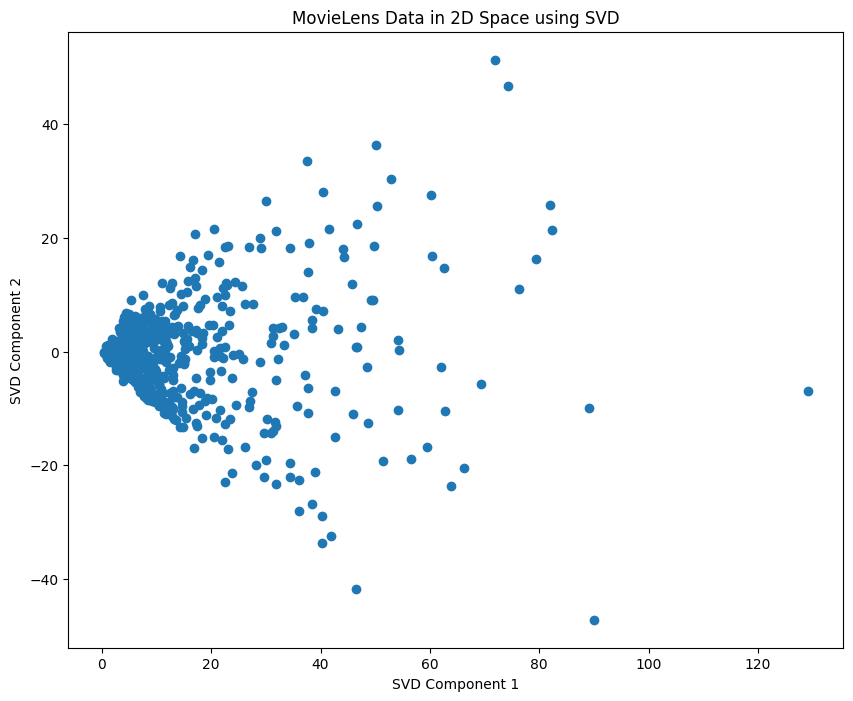

In [ ]:
# If you want to visualize the data in 2D space, you can run TruncatedSVD with 2 components
svd_2d = TruncatedSVD(n_components=2, random_state=42)
user_item_svd_2d = svd_2d.fit_transform(user_item_sparse_matrix)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(user_item_svd_2d[:, 0], user_item_svd_2d[:, 1])
plt.title('MovieLens Data in 2D Space using SVD')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()


The 2D scatter plot from the SVD of the MovieLens dataset suggests a dispersion of points that could represent the variance in user preferences or movie features. The plot doesn't show distinct clusters, which could mean that the top two singular values don't capture clear-cut distinctions between different types of users or movies. This can be typical for complex datasets like movie ratings, where tastes are diverse and multifaceted. The spread of points might also indicate that more components are needed to capture the nuances of the dataset or that a different dimensionality reduction technique might reveal more defined clustering.

**PCA on the movie-lens-small-latest-datase:**

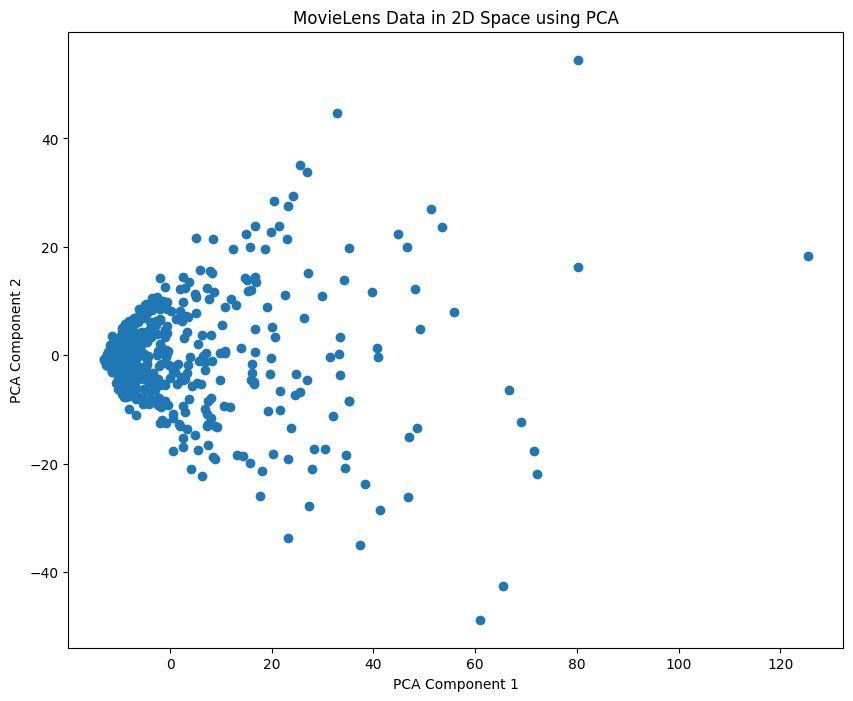

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Using the TruncatedSVD output user_item_sparse_matrix since PCA requires dense input
# and the truncated SVD has already reduced the dimensionality to a manageable size

# Initialize PCA with 2 components for visualization
pca = PCA(n_components=2, random_state=42)
user_item_pca = pca.fit_transform(user_item_sparse_matrix.toarray())  # Convert sparse matrix to dense

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(user_item_pca[:, 0], user_item_pca[:, 1])
plt.title('MovieLens Data in 2D Space using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


CA visualization closely resembles the SVD one, it suggests that both methods are capturing similar structures in the data, which is expected since PCA is essentially based on SVD. This indicates consistency in how these linear dimensionality reduction techniques are reducing the MovieLens dataset.

### **apply SVD to the COVID-19 NLP Text Classification dataset**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine the training and test data for text processing
all_text = pd.concat([covid_nlp_train_df['OriginalTweet'], covid_nlp_test_df['OriginalTweet']])

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit features to 1000 for memory efficiency

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(all_text)


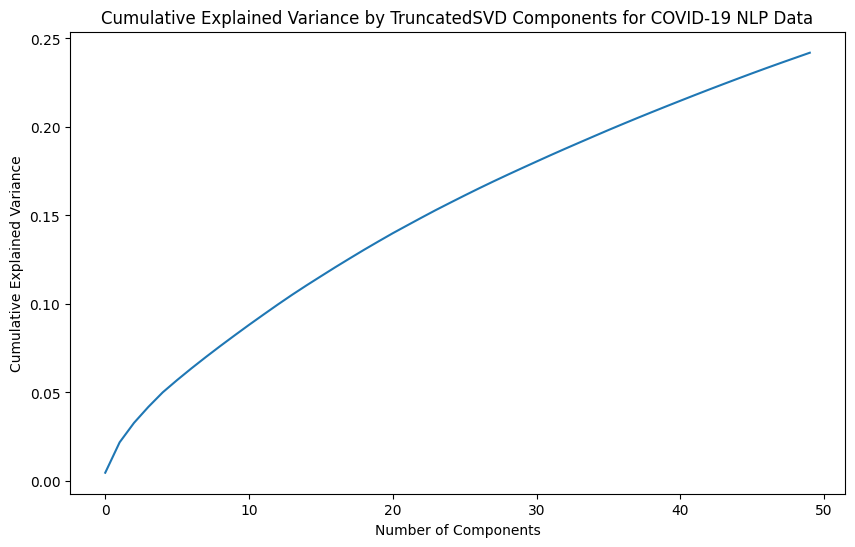

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Applying Truncated SVD to reduce the TF-IDF matrix to 50 components
svd = TruncatedSVD(n_components=50, random_state=42)
tfidf_svd_matrix = svd.fit_transform(tfidf_matrix)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.title('Cumulative Explained Variance by TruncatedSVD Components for COVID-19 NLP Data')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


 It indicates that the first 50 components explain about 25% of the variance in the dataset. This suggests that the textual data is high-dimensional and that a relatively large number of components would be needed to capture most of the variance. The gradual increase without a clear elbow in the plot also implies that the information is spread out across many dimensions, which is characteristic of text data.

## **Apply t-SNE on COVID-19 NLP Text Classification dataset**

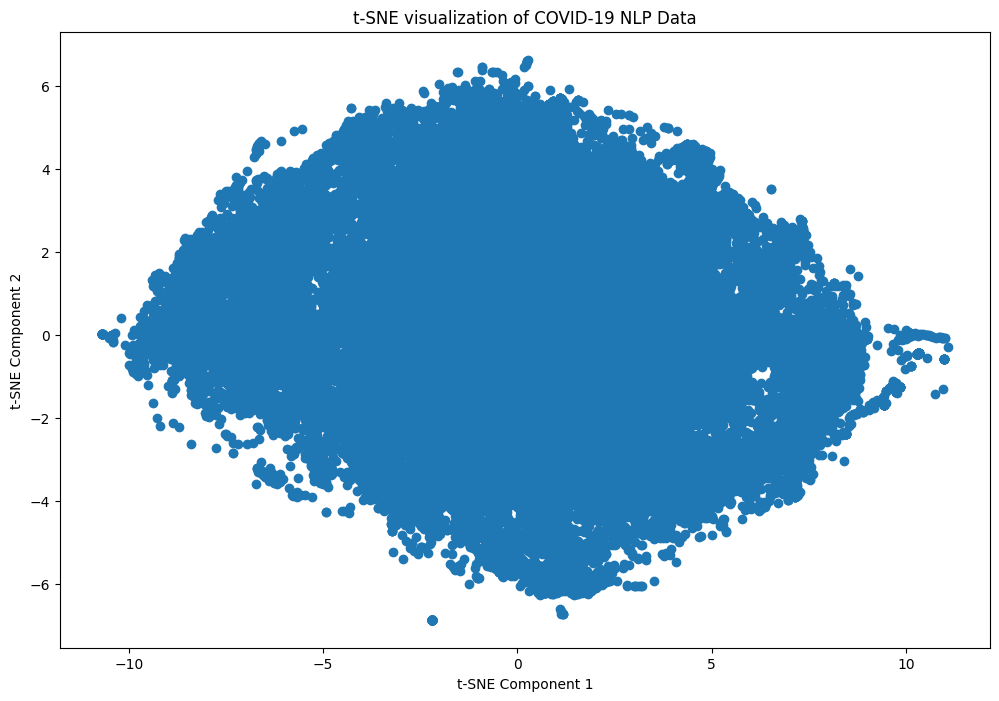

In [ ]:

from sklearn.decomposition import TruncatedSVD

# First reduce dimensionality before feeding to t-SNE
svd = TruncatedSVD(n_components=50, random_state=42)
svd_result = svd.fit_transform(tfidf_matrix)

# Now apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(svd_result)

# Visualize the results with a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE visualization of COVID-19 NLP Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


The t-SNE visualization depicts the COVID-19 NLP data in a 2-dimensional space, with data points indicating tweets. The distribution suggests that there may be some underlying patterns or clusters in the data. However, the overall shape is quite spread out, without clear, distinct clusters, which can be typical for complex datasets like natural language. This pattern may imply that the dataset contains a wide variety of topics or sentiments that are not easily separable into distinct groups.

# **MDS on  Zoo animals data**

In [ ]:
from google.colab import files

# Step 1: Upload the kaggle.json file
uploaded = files.upload()

# Step 3: Move the kaggle.json file into the appropriate location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset
!kaggle datasets download -d sweedendataset/dataset-classification-animal-zoo

# Step 5: Unzip the downloaded file
!unzip dataset-classification-animal-zoo.zip

# Step 6: Load the dataset


Saving kaggle.json to kaggle.json
  0% 0.00/1.45k [00:00<?, ?B/s]
100% 1.45k/1.45k [00:00<00:00, 4.54MB/s]
Archive:  dataset-classification-animal-zoo.zip
  inflating: dataset_classification_animal_zoo.csv  


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

# Load the dataset using the correct file name
zoo_data = pd.read_csv('/content/dataset_classification_animal_zoo.csv')

# Display the first few rows of the DataFrame
zoo_data.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4.0,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4.0,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0.0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4.0,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4.0,True,False,True,mammal


# **applying Multidimensional Scaling (MDS) **

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances

# Encoding the categorical data
le = LabelEncoder()
zoo_data['class_type'] = le.fit_transform(zoo_data['class_type'])

# Fill NaN values with a default value (e.g., 0)
zoo_data_filled = zoo_data.fillna(0)

# Compute the pairwise distance matrix
distance_matrix = pairwise_distances(zoo_data_filled.drop('animal_name', axis=1), metric='euclidean')


## **Applying MDS and Visualizing the Results**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


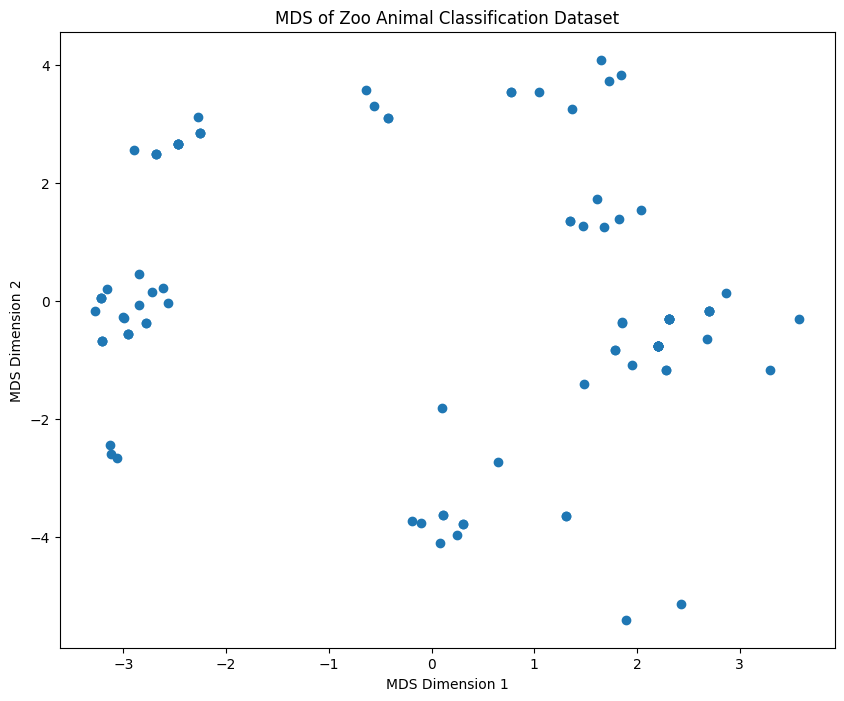

In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Initialize and fit MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(distance_matrix)

# Visualize the results with a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(mds_coords[:, 0], mds_coords[:, 1])
plt.title('MDS of Zoo Animal Classification Dataset')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()


## **Insights**

The MDS visualization of the Zoo Animal Classification dataset shows the animals plotted in a two-dimensional space. The layout of the points suggests groupings or similarities between different animals, with some clear gaps that may indicate distinct categories. MDS has effectively reduced the multi-dimensional feature space into two dimensions while preserving the distances between the points as much as possible, allowing us to visualize the dataset's structure and potentially identify clusters.

## **Change hyper Parameters**

In [ ]:
# Apply MDS with a different number of components
mds_hyperparam = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
mds_coords_hyperparam = mds_hyperparam.fit_transform(distance_matrix)

# Now mds_coords_hyperparam contains a 3-dimensional representation of the data


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


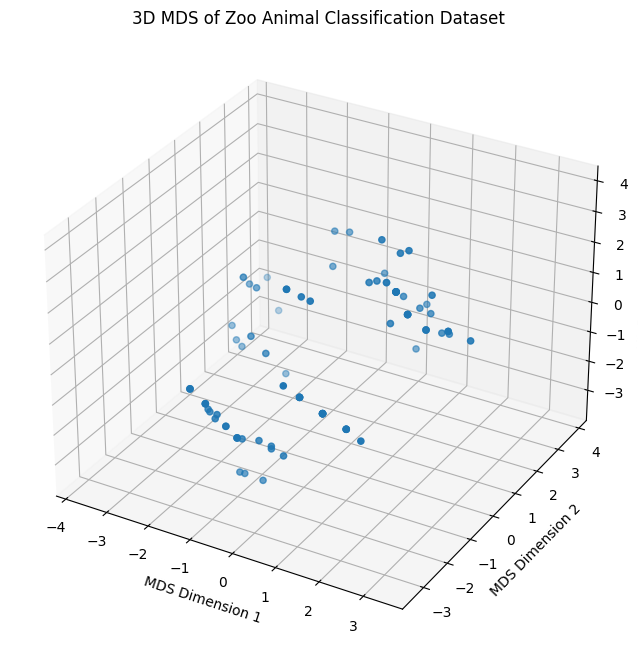

In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply MDS with 3 components
mds_3d = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
mds_coords_3d = mds_3d.fit_transform(distance_matrix)

# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mds_coords_3d[:, 0], mds_coords_3d[:, 1], mds_coords_3d[:, 2])
ax.set_title('3D MDS of Zoo Animal Classification Dataset')
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
plt.show()


### **Insights:**


The 3D MDS visualization provides a richer representation by introducing another spatial dimension, which might reveal more complex patterns among the data points. Compared to the 2D plot, this 3D plot could show:

Greater separation between clusters: Some groups of animals that appeared close in 2D might be more spread out in 3D, indicating a greater dissimilarity when considering an additional feature axis.
Hidden structures: Relationships not visible in 2D due to the overlap of points can become evident in 3D, highlighting subtler differences among the animals.

## **LLE on Zoo Animals data(Not expexted to work)**

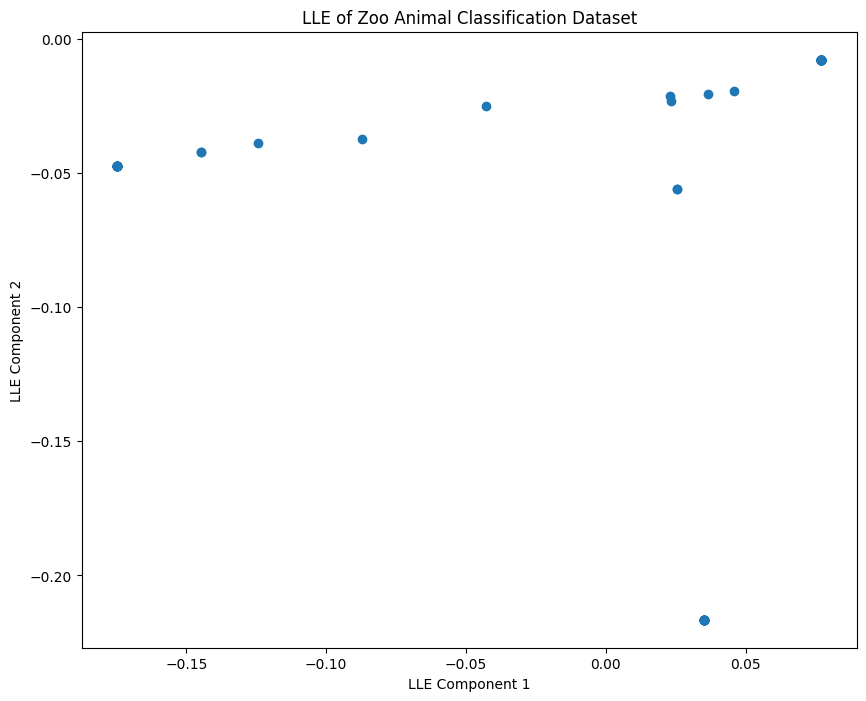

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Initialize LLE with hyperparameters
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, random_state=42)

# Prepare the data by dropping non-numeric columns
lle_data = zoo_data_filled.drop(['animal_name', 'class_type'], axis=1)

# Fit and transform the data using LLE
lle_result = lle.fit_transform(lle_data)

# Visualize the results with a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(lle_result[:, 0], lle_result[:, 1])
plt.title('LLE of Zoo Animal Classification Dataset')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.show()


## **Insights:**

The LLE plot for the Zoo Animal Classification dataset shows the data points tightly clustered around the origin with little spread. This could indicate that LLE didn't effectively unfold the manifold to reveal the underlying structure, possibly due to the nature of the dataset or the choice of hyperparameters.

**Why it may not have worked as expected:**

**Data Nature:** LLE assumes that the data lies on a smooth, non-linear manifold. If the dataset's structure doesn't fit these assumptions well, LLE may not provide meaningful embeddings.

**Categorical Variables**: The dataset contains many binary categorical variables, and LLE typically works better with continuous variables where local linearity can be assumed.

**Hyperparameters:** The number of neighbors (n_neighbors) is a crucial hyperparameter for LLE. The chosen value might not be optimal for revealing the data's structure.

**Dimensionality:** Reducing to two dimensions might be too limiting to capture the complexity of the data.

# **Locally Linear Embedding (LLE) on Chinese Digit Recorgnizer**

In [ ]:
!kaggle datasets download -d fedesoriano/chinese-mnist-digit-recognizer

 64% 5.00M/7.81M [00:00<00:00, 38.0MB/s]
100% 7.81M/7.81M [00:00<00:00, 54.7MB/s]


In [ ]:
!unzip chinese-mnist-digit-recognizer.zip

Archive:  chinese-mnist-digit-recognizer.zip
  inflating: chineseMNIST.csv        


In [ ]:
import pandas as pd

# Load the dataset
chinese_mnist_df = pd.read_csv('chineseMNIST.csv')

# Display the first few rows of the DataFrame
chinese_mnist_df.head()


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九


### **perform LLE on a subset of the Chinese MNIST**

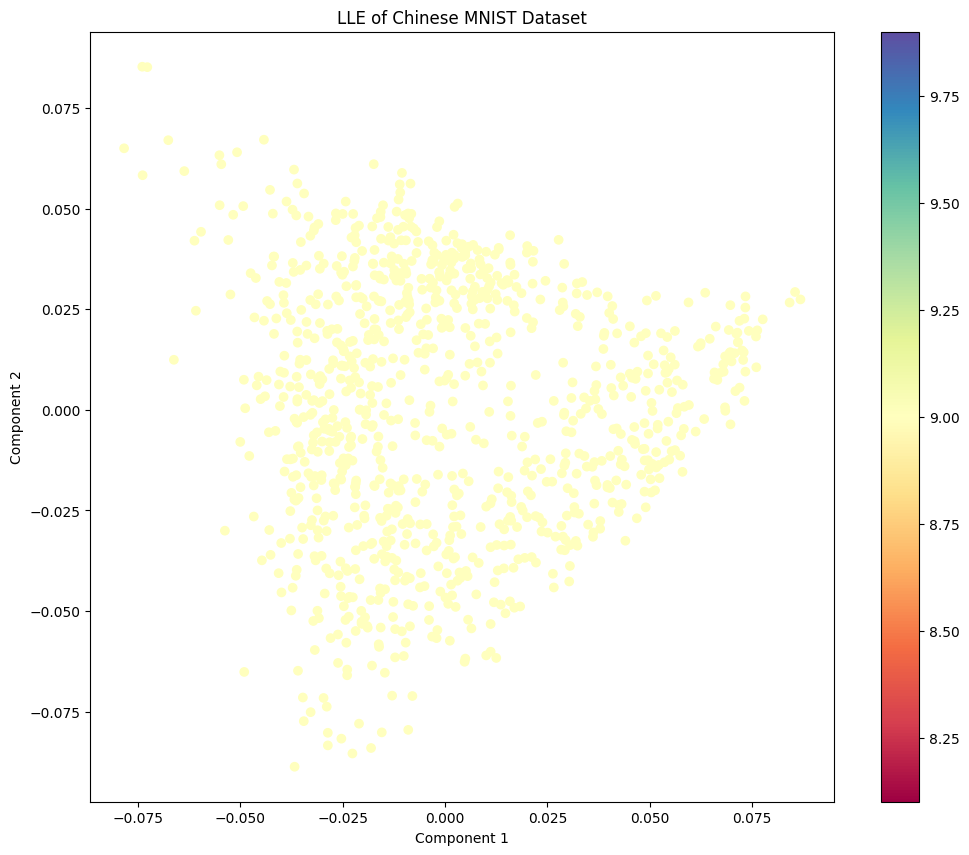

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
import numpy as np

# Select a subset of the data for LLE due to its computational cost
# For instance, we'll take the first 1000 rows
subset_data = chinese_mnist_df.iloc[:1000, :-2]  # Exclude the last two columns which are 'label' and 'character'

# Convert to a numpy array and normalize pixel values to be between 0 and 1
X = subset_data.to_numpy() / 255.0

# Apply LLE
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, random_state=42)
X_lle = lle.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(12, 10))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=chinese_mnist_df['label'].iloc[:1000], cmap=plt.cm.Spectral)
plt.colorbar()
plt.title('LLE of Chinese MNIST Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


## **Insights:**

The LLE visualization of the Chinese MNIST dataset shows the data points in a two-dimensional space, with the color representing the label (digit) of each image. The plot does not show distinct clusters; instead, there's a fairly uniform spread of points. This could indicate that LLE has not effectively separated the different digits into distinct groups, which suggests that the local linear relationships LLE seeks to preserve do not sufficiently capture the differences between the various digits, or that the hyperparameters need adjustment to better capture the dataset's structure.

### **Undjusting hyperparameter**

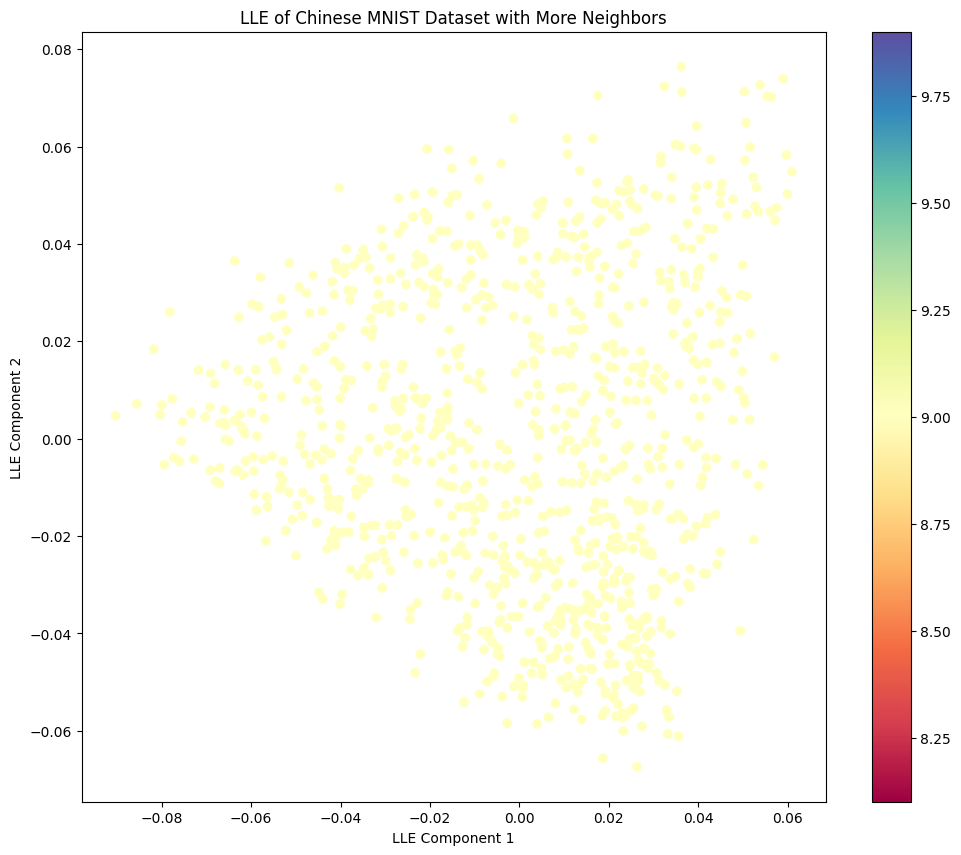

In [ ]:
# Increase the number of neighbors for LLE
lle_with_more_neighbors = LocallyLinearEmbedding(n_neighbors=30, n_components=2, random_state=42)
lle_result_with_more_neighbors = lle_with_more_neighbors.fit_transform(X)

# Visualize the results with a scatter plot using more neighbors
plt.figure(figsize=(12, 10))
plt.scatter(lle_result_with_more_neighbors[:, 0], lle_result_with_more_neighbors[:, 1],
            c=chinese_mnist_df['label'].iloc[:1000], cmap=plt.cm.Spectral)
plt.colorbar()
plt.title('LLE of Chinese MNIST Dataset with More Neighbors')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.show()


# **Insights:**


The updated LLE visualization with more neighbors still shows a broad, uniform distribution of data points without clear clustering. This suggests that increasing the neighborhood size did not result in more distinct groupings of the digits. The color gradient does not show any discernible pattern, indicating that LLE might not be capturing the underlying structure of the data in a way that separates the different Chinese characters. This could be due to the complexity of the characters, the high dimensionality of the space, or inherent limitations of LLE when dealing with this particular type of data.

# **Isomap on the Chinese MNIST datase**

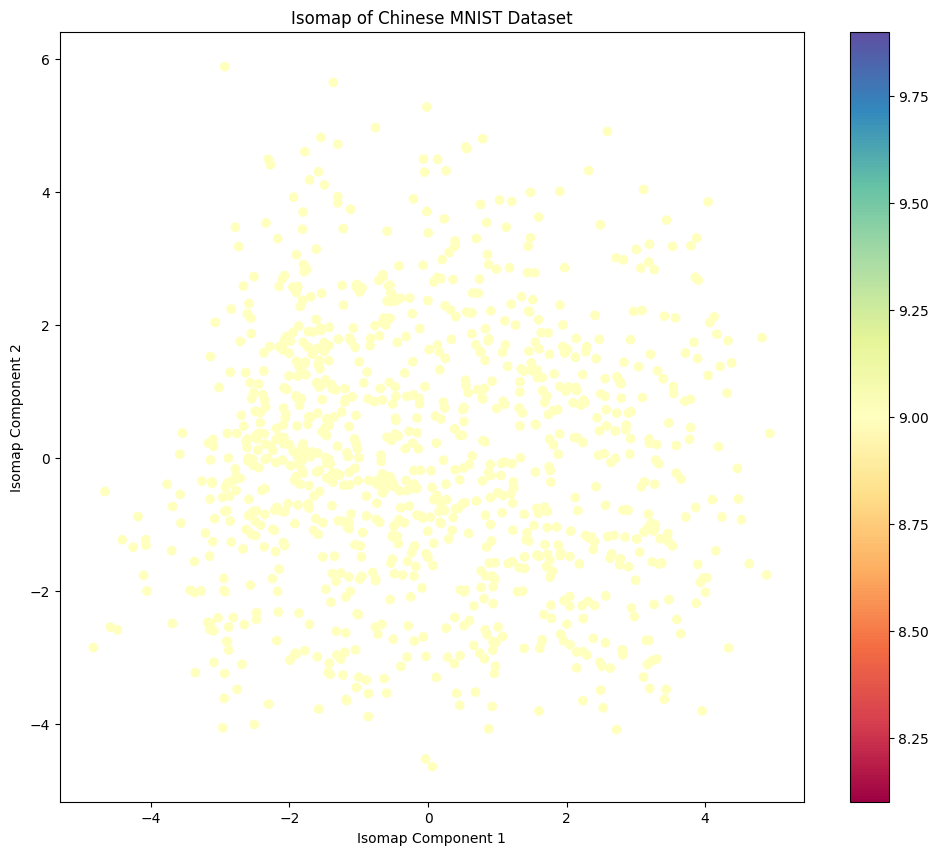

In [ ]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Selecting the same subset of data
X = subset_data.to_numpy() / 255.0

# Apply Isomap
iso = Isomap(n_neighbors=10, n_components=2)
X_iso = iso.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(12, 10))
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=chinese_mnist_df['label'].iloc[:1000], cmap=plt.cm.Spectral)
plt.colorbar()
plt.title('Isomap of Chinese MNIST Dataset')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.show()


## **Insights**

The Isomap visualization of the Chinese MNIST dataset shows the data points dispersed in a two-dimensional space. Unlike the previous LLE plot, the Isomap plot seems to spread the points over a wider area, which could indicate that Isomap is able to capture more of the global structure of the data. However, the lack of clear clustering or separation between different labels suggests that the manifold learning technique still isn't fully distinguishing between the various characters.

This could mean that Isomap, while perhaps capturing more global variance than LLE, still struggles with the complexity of the data or the hyperparameters need further tuning. Additionally, the inherent similarities between different Chinese characters may make it difficult for Isomap to clearly separate them without a more nuanced approach or additional feature engineering.

# **UMAP on Spotify Classification dataset**

In [ ]:
!kaggle datasets download -d geomack/spotifyclassification

  0% 0.00/98.4k [00:00<?, ?B/s]
100% 98.4k/98.4k [00:00<00:00, 117MB/s]


In [ ]:
!unzip spotifyclassification.zip

Archive:  spotifyclassification.zip
  inflating: data.csv                


In [ ]:
import pandas as pd

# Load the dataset
spotify_data = pd.read_csv('data.csv')

# Display the first few rows of the DataFrame
spotify_data.head()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## **applying UMAP to Spotify Classification dataset**

In [ ]:
!pip install umap-learn



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=1c6361dadd5fc97228cc4e6c99501f35fcb9ea031c8f86e1e2f960c0d84231bf
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


TypeError: ignored

<Figure size 1200x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


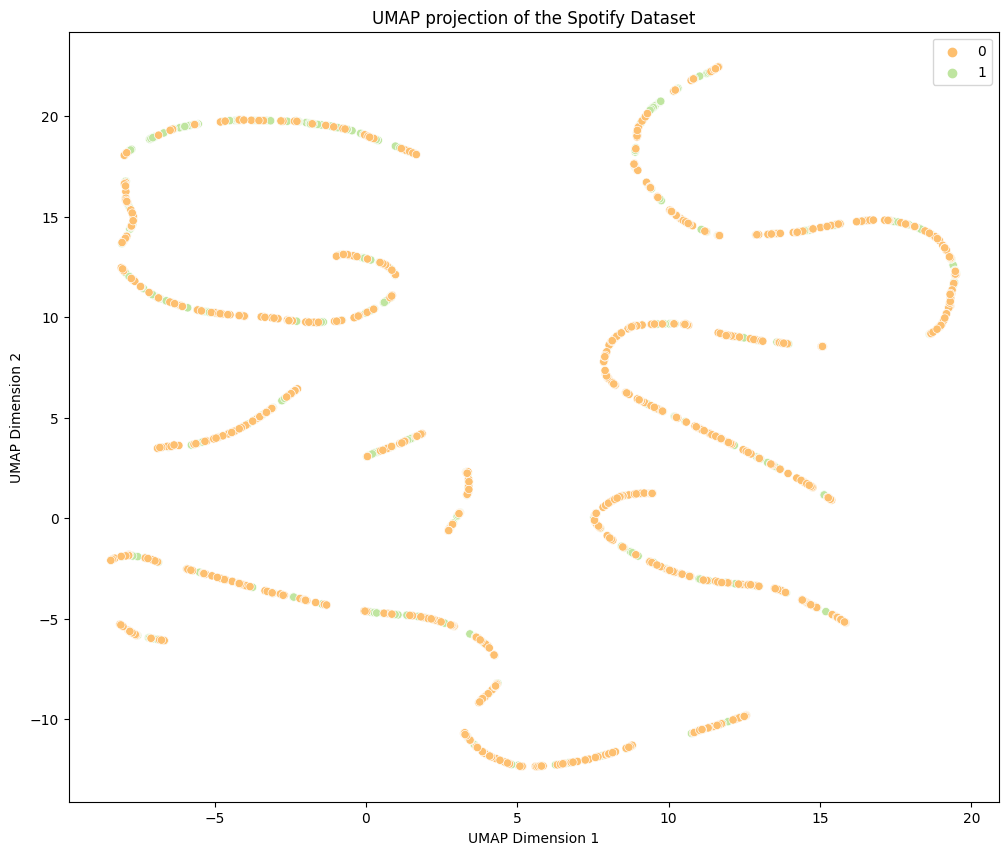

In [ ]:
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data, drop non-numeric and non-essential columns
spotify_numeric = spotify_data.drop(['Unnamed: 0', 'song_title', 'artist'], axis=1)

# Perform UMAP dimensionality reduction
umap_reducer = UMAP(random_state=42)
umap_embedding = umap_reducer.fit_transform(spotify_numeric)

# Plot the results with Seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], hue=spotify_data['target'], palette='Spectral')
plt.title('UMAP projection of the Spotify Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()


## **Insights**

The **UMAP visualization** of the Spotify dataset reveals a distinct structure with several well-defined curvilinear formations. This pattern suggests that UMAP has successfully captured some intrinsic relationships within the data, likely corresponding to different underlying characteristics of the songs.

The two classes labeled '0' and '1' appear interspersed throughout these formations, indicating that while there is a clear geometric structure to the data, the class separation is not entirely evident in this two-dimensional reduction. This could imply that the features influencing the song classification are complex and may require more dimensions to be distinctly separated or that the 'target' variable encodes a more nuanced aspect of the data not immediately separable by UMAP in two dimensions.

### **Undjusting hyperparameter**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


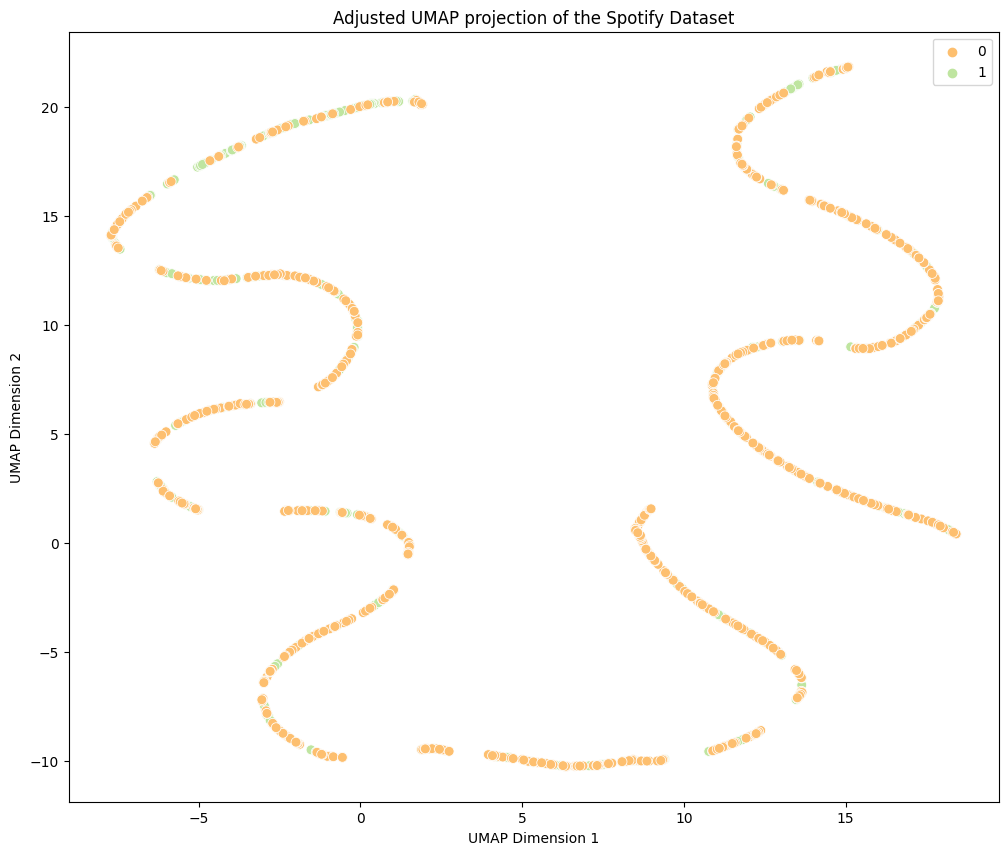

In [ ]:
# Adjust UMAP hyperparameters
umap_reducer = UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
umap_embedding_adjusted = umap_reducer.fit_transform(spotify_numeric)

# Plot the adjusted UMAP results
plt.figure(figsize=(12, 10))
sns.scatterplot(x=umap_embedding_adjusted[:, 0], y=umap_embedding_adjusted[:, 1],
                hue=spotify_data['target'], palette='Spectral', s=50)
plt.title('Adjusted UMAP projection of the Spotify Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()


**Insights**

UMAP visualization with the increased number of neighbors shows that the data points are now arranged in more continuous and smoother curves or clusters. Despite this change, the classes labeled '0' and '1' still appear to be interspersed throughout the space without clear separation.

The smoothness of the curves suggests that the increased neighborhood size allows UMAP to capture broader structures within the data, possibly highlighting more global relationships between songs. However, the lack of class separation might indicate that the target variable is related to complex features that are not easily separated in the reduced space or that further hyperparameter tuning is required to achieve better class distinction.

## **Apply t-SNE to the Spotify Classification dataset**

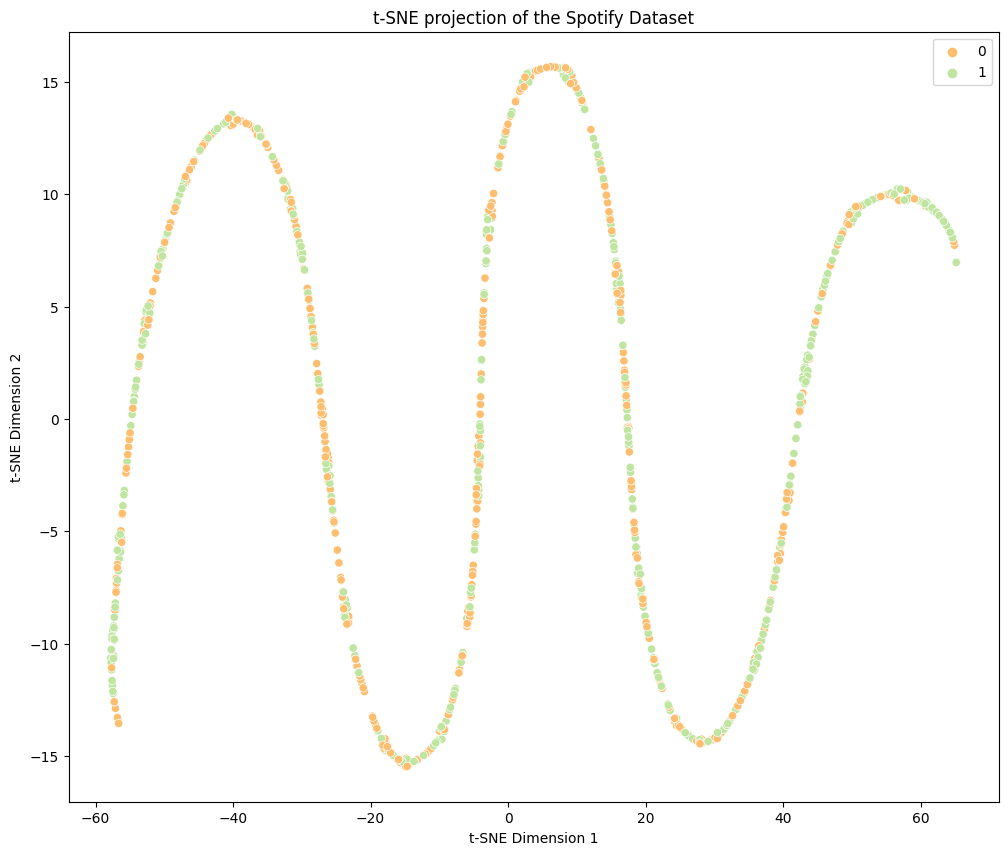

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

from sklearn.manifold import TSNE

# Sample a subset of the data to speed up the process
sampled_data = spotify_numeric.sample(1000, random_state=42)
sampled_indices = sampled_data.index

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Perform t-SNE on the sampled subset
tsne_results = tsne.fit_transform(sampled_data)

# Plot the t-SNE result
plt.figure(figsize=(12, 10))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=spotify_data.loc[sampled_indices, 'target'], palette='Spectral')
plt.title('t-SNE projection of the Spotify Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()



### **Insights**

The t-SNE visualization of the Spotify dataset shows a series of arch-like structures, with data points aligned along these curves. The two classes (0 and 1) are intermingled within these arches, suggesting a complex underlying structure where the class distinction isn't clear-cut in the reduced t-SNE space.

The patterns observed here might reflect the intrinsic complexities of musical attributes and how they relate to the target variable. The continuity in the arches could imply that there are smooth gradients of change in the data features, which t-SNE has unfolded into these visible paths. However, the overlap of classes indicates that a higher-dimensional space might be necessary to separate them distinctly, or other features not included in the dataset could play a crucial role in their differentiation.

**SVD to the Spotify Classification dataset**

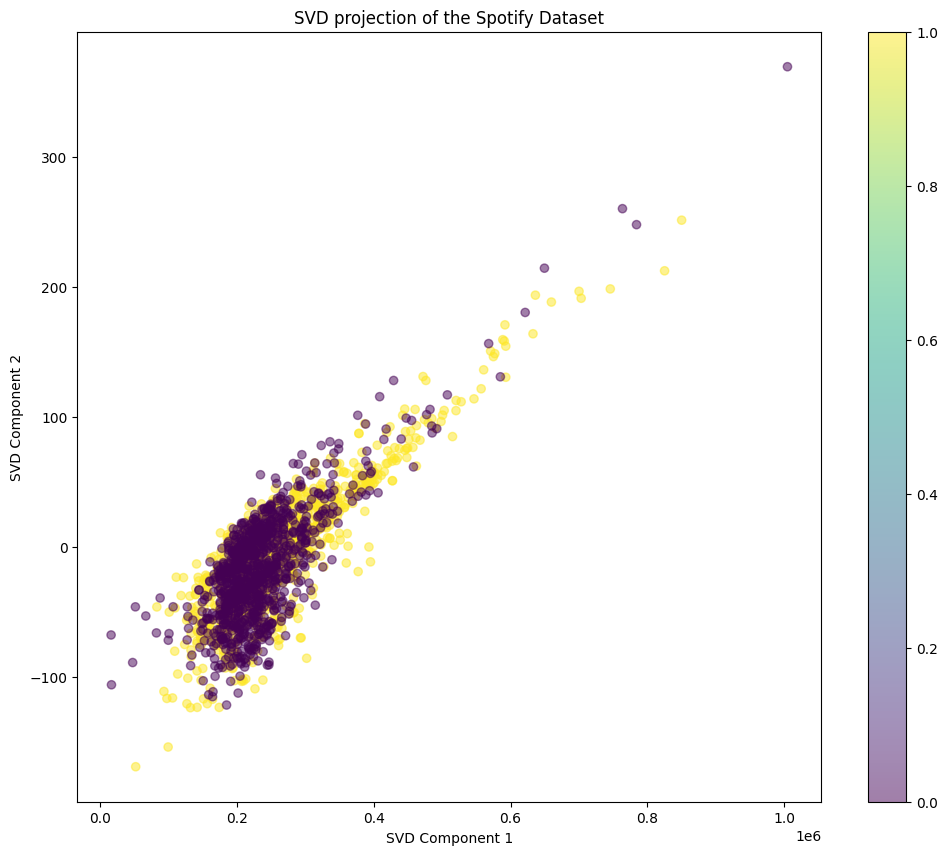

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Define the SVD instance
svd = TruncatedSVD(n_components=2, random_state=42)

# Fit and transform the data
# Ensure the data does not include the target column or non-numeric columns
svd_results = svd.fit_transform(spotify_numeric.drop('target', axis=1))

# Plot the SVD results
plt.figure(figsize=(12, 10))
plt.scatter(svd_results[:, 0], svd_results[:, 1], c=spotify_data['target'], alpha=0.5)
plt.colorbar()
plt.title('SVD projection of the Spotify Dataset')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()


### **Insights**

The SVD visualization of the Spotify dataset shows a clear gradient, with data points spreading out along the diagonal axis formed by SVD Component 1 and SVD Component 2. This gradient may represent varying levels of a dominant feature within the dataset, such as song popularity or a particular aspect of musical composition.

The color gradient represents the target variable and suggests that songs from different target classes are distributed along this dominant feature axis. However, there's no distinct separation between classes, implying that the target variable is influenced by multiple features, which are not fully captured by the first two SVD components alone. Further analysis with additional components or different techniques might reveal more insights.

## **Umap on heart-disease**

In [ ]:
!kaggle datasets download -d cherngs/heart-disease-cleveland-uci

heart-disease-cleveland-uci.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip heart-disease-cleveland-uci.zip

Archive:  heart-disease-cleveland-uci.zip
replace heart_cleveland_upload.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart_cleveland_upload.csv  


In [ ]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


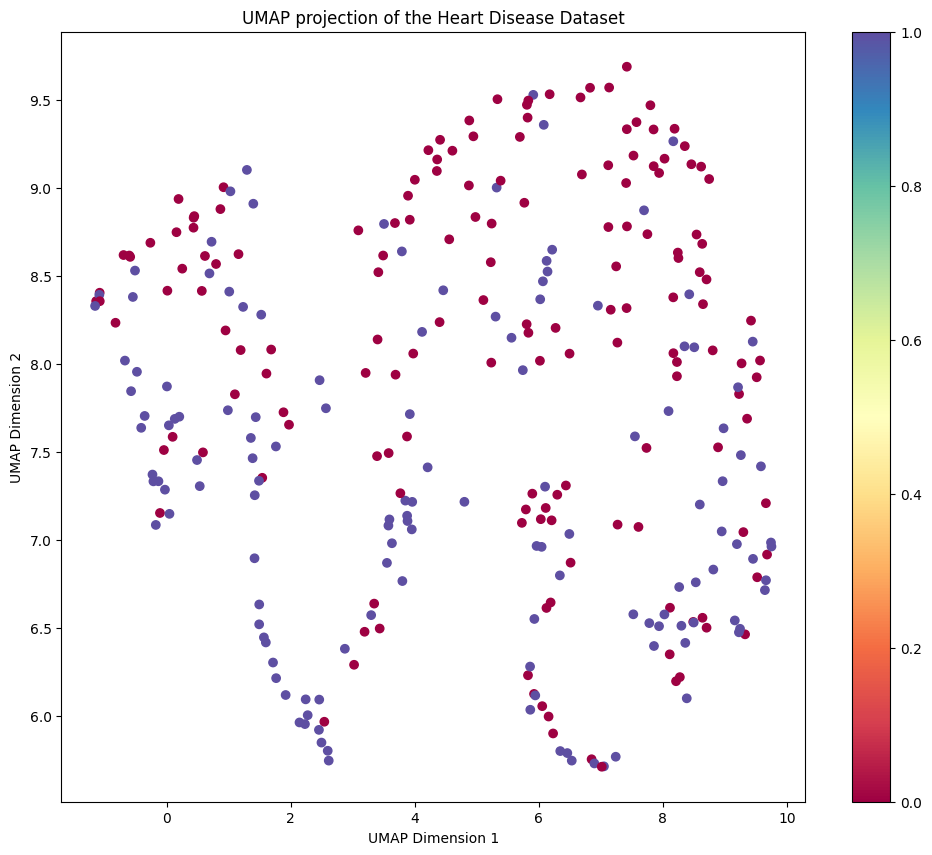

In [ ]:


import umap
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
heart_data = pd.read_csv('heart_cleveland_upload.csv')

# Assuming the last column is the target and the rest are features
# It's important to handle missing values and categorical features before proceeding
# For demonstration, we'll proceed assuming no missing values or necessary preprocessing
X = heart_data.iloc[:, :-1].values
y = heart_data.iloc[:, -1].values

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# Plot the results
plt.figure(figsize=(12, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral')
plt.colorbar()
plt.title('UMAP projection of the Heart Disease Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


### **Insights**

The UMAP visualization of the Heart Disease Dataset shows clusters of data points, which could potentially correspond to patterns related to the presence or absence of heart disease. The color gradient represents different levels of a particular feature or class label in the dataset.

From the plot, it's evident that UMAP has discovered a structure where certain groups of points are closer together, suggesting similar characteristics among them. However, there's no clear separation between different color-coded classes, which may indicate overlapping features among patients or that a more complex relationship exists that cannot be fully captured in two dimensions alone. This underscores the multifaceted nature of medical data and the potential need for more advanced analysis or higher-dimensional representation to distinguish between different states of heart disease accurately.

### **Adjusting Hyperparameters**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


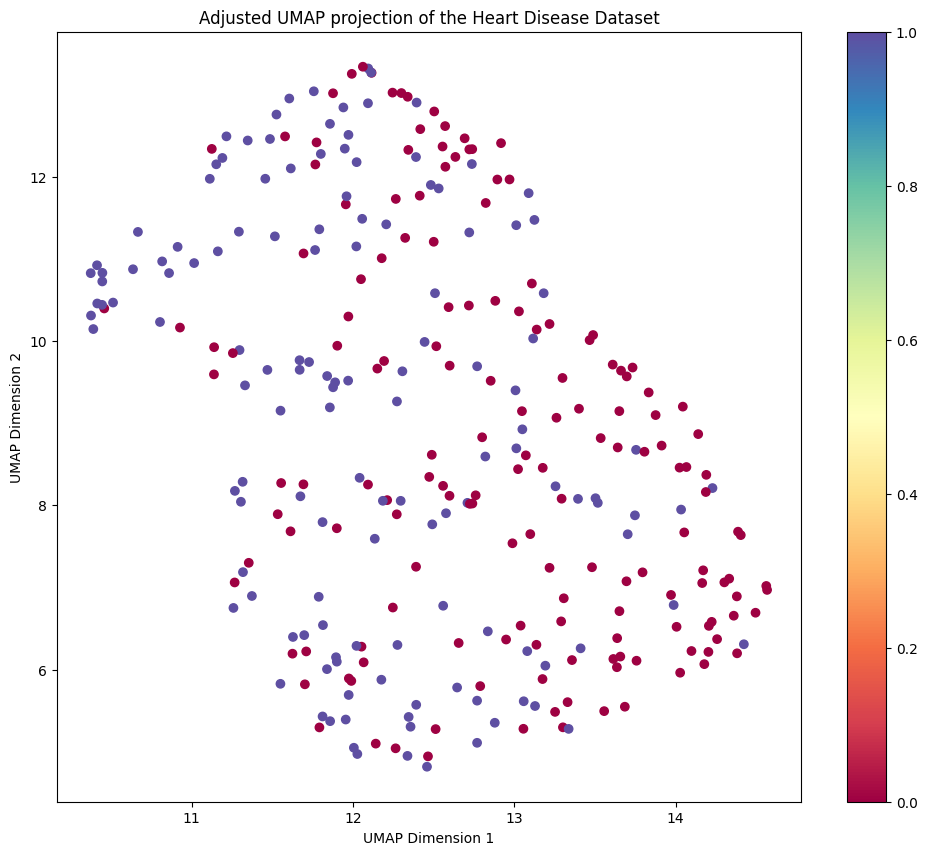

In [ ]:
# Adjust UMAP hyperparameters such as n_neighbors and min_dist
adjusted_umap_reducer = umap.UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=42)
adjusted_embedding = adjusted_umap_reducer.fit_transform(X)

# Plot the adjusted UMAP results
plt.figure(figsize=(12, 10))
plt.scatter(adjusted_embedding[:, 0], adjusted_embedding[:, 1], c=y, cmap='Spectral')
plt.colorbar()
plt.title('Adjusted UMAP projection of the Heart Disease Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()



### **Insights**

The adjusted UMAP visualization of the Heart Disease Dataset appears to show a more dispersed clustering of data points than the previous UMAP plot. This suggests that by increasing the number of neighbors, the algorithm has placed a greater emphasis on the global data structure, potentially revealing more nuanced groupings within the dataset.

Clusters of points may represent patients with similar profiles regarding their heart disease status. The color gradient, which likely corresponds to the severity or presence of heart disease, does not show a clear separation between different conditions. This may imply that the conditions are not distinctly separable in the space defined by the features provided, or it could reflect the complex nature of heart disease where a single low-dimensional representation cannot capture all the variance related to the disease outcomes.

## **MDS on heart-disease**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


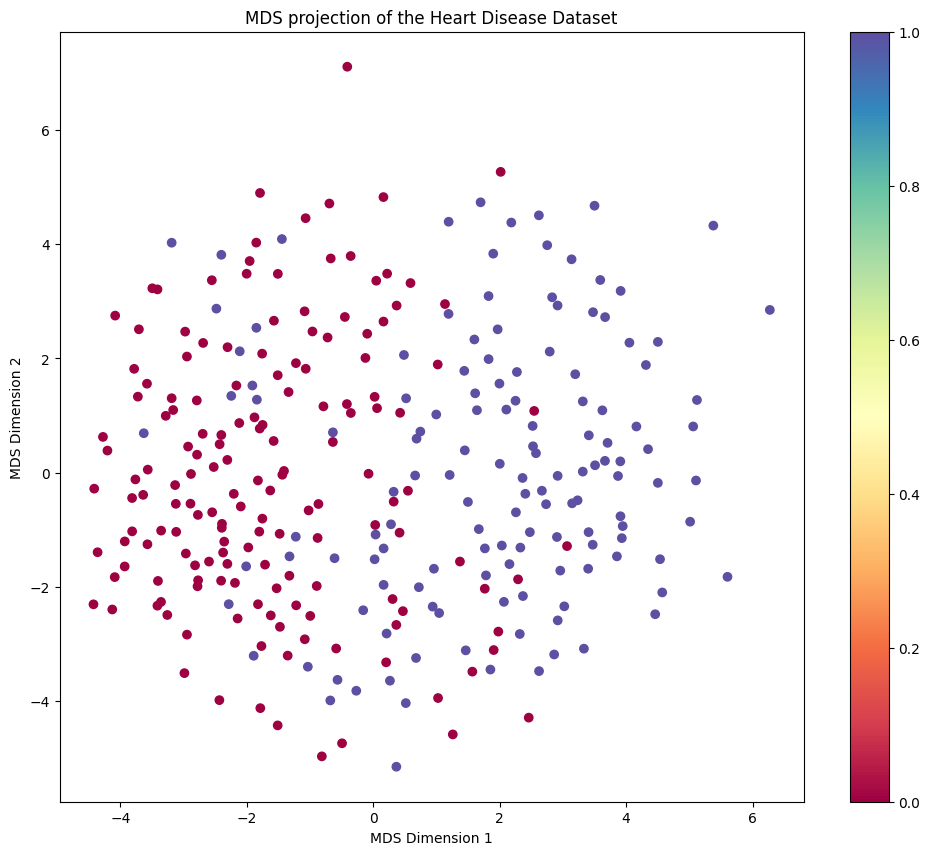

In [ ]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize MDS
mds = MDS(n_components=2, random_state=42)

# Fit and transform the data
mds_results = mds.fit_transform(X_scaled)

# Plot the MDS results
plt.figure(figsize=(12, 10))
plt.scatter(mds_results[:, 0], mds_results[:, 1], c=y, cmap='Spectral')
plt.colorbar()
plt.title('MDS projection of the Heart Disease Dataset')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()


## **Insights**

The MDS visualization of the Heart Disease Dataset displays a scatter of points with no clear clusters, which may suggest that the dataset lacks distinct group separations based on the MDS components derived. The points are colored according to a gradient, likely corresponding to the severity or classification of heart disease.

The absence of distinct clusters in this MDS plot could indicate that the features of the dataset represent a complex space where heart disease status is not linearly separable. This complexity is common in medical datasets where multiple factors interplay. MDS has attempted to preserve the dissimilarities or distances between the data points, but the underlying relationships may require more dimensions to become apparent, or perhaps a non-linear method might reveal more structure.